In [88]:
## Imports and loading csv

from bs4 import BeautifulSoup
import pandas as pd
import requests

ev_df = pd.read_csv('EV_registrations_by_county.csv')
stations_df = pd.read_csv('Maryland_charging_stations.csv')
registrations_df = pd.read_csv('Maryland_registrations_county_year.csv')

In [89]:
## Scrape county information and build dictionary mapping zip codes to counties

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
page = requests.get('https://www.zipcodestogo.com/Maryland/', headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

leftCol = soup.find('div', {'id': 'leftCol'})
leftColTable = leftCol.find('table', {'class': 'inner_table'})
zip_information_rows = leftColTable.findAll('tr')[2:]
zip_county_dict = {list(row.children)[1].text: list(row.children)[5].text for row in zip_information_rows}
zip_county_dict

{'20601': 'Charles',
 '20602': 'Charles',
 '20603': 'Charles',
 '20604': 'Charles',
 '20606': 'Saint Marys',
 '20607': 'Prince Georges',
 '20608': 'Prince Georges',
 '20609': 'Saint Marys',
 '20610': 'Calvert',
 '20611': 'Charles',
 '20612': 'Charles',
 '20613': 'Prince Georges',
 '20615': 'Calvert',
 '20616': 'Charles',
 '20617': 'Charles',
 '20618': 'Saint Marys',
 '20619': 'Saint Marys',
 '20620': 'Saint Marys',
 '20621': 'Saint Marys',
 '20622': 'Saint Marys',
 '20623': 'Prince Georges',
 '20624': 'Saint Marys',
 '20625': 'Charles',
 '20626': 'Saint Marys',
 '20627': 'Saint Marys',
 '20628': 'Saint Marys',
 '20629': 'Calvert',
 '20630': 'Saint Marys',
 '20632': 'Charles',
 '20634': 'Saint Marys',
 '20635': 'Saint Marys',
 '20636': 'Saint Marys',
 '20637': 'Charles',
 '20639': 'Calvert',
 '20640': 'Charles',
 '20643': 'Charles',
 '20645': 'Charles',
 '20646': 'Charles',
 '20650': 'Saint Marys',
 '20653': 'Saint Marys',
 '20656': 'Saint Marys',
 '20657': 'Calvert',
 '20658': 'Charles

In [90]:
## Add county column to our stations dataframe

def get_station_county(row):
    if str(row['ZipCode']) in zip_county_dict:
        return zip_county_dict[str(row['ZipCode'])]
    return None

stations_df['county'] = stations_df.apply(lambda row: get_station_county(row), axis=1)
stations_df

,Program,Program Link,Station Name,MEA Contribution,Address,City,State,ZipCode,Location,Access,county
0,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Antwerpen Nissan - Clarksville,NaN,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,Howard
1,Electric Vehicle Supply Equipment Tax Credit P...,http://energy.maryland.gov/Transportation/evse...,Capitol Fisker,437.00,6500 Capitol Drive,Greenbelt,MD,20770,"6500 Capitol Drive\nGreenbelt, Maryland 20770\...",Public,Prince Georges
2,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Hamilton Nissan,NaN,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public,Washington
3,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Walgreens,NaN,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public,Baltimore City
4,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,The Frederick Motor Company,NaN,1 Waverley Dr,Frederick,MD,21702,"1 Waverley Dr\nFrederick, Maryland 21702\n(39....",Public,Frederick
...,...,...,...,...,...,...,...,...,...,...,...
274,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,JBG - Woodglen Drive,NaN,11351 Woodglen Dr,Rockville,MD,20852,"11351 Woodglen Dr\nRockville, Maryland 20852\n...",Public,Montgomery
275,E-85 Refueling Stations,http://energy.maryland.gov/Transportation/e85R...,Chevron,NaN,1395 West Patrick St,Frederick,MD,21702,"1395 West Patrick St\nFrederick, Maryland 2170...",Public,Frederick
276,Residential Electric Vehicle Supply Equipment ...,http://energy.maryland.gov/Transportation/evse/,NaN,144.22,NaN,Chevy Chase,MD,20815,"Chevy Chase, Maryland 20815\n(38.9779531230004...",NaN,Montgomery
277,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,City of Towson - Union Garage,NaN,8000 York Rd,Towson,MD,21252,"8000 York Rd\nTowson, Maryland 21252\n(39.3929...",Public,Baltimore


In [91]:
## We are only interested the number of public charging stations

stations_df = stations_df[stations_df['Access'] == 'Public']
stations_df = stations_df.drop(columns=[
                            'Program',
                            'Program Link',
                            'Station Name',
                            'MEA Contribution',
                            'Address',
                            'City',
                            'State',
                            'ZipCode',
                            'Location',
                            'Access'
])
county_num_stations = stations_df.groupby(['county']).size()

In [92]:
## Scrape again- this time, just a list of counties; normalize list with those in county_num_stations

page = requests.get('https://msa.maryland.gov/msa/mdmanual/01glance/html/county.html', headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

counties_anchor = soup.find('a', {'name': 'counties'})
counties_table = counties_anchor.find('table')
counties_list = [' '.join(i.text.lstrip().split(' ')).replace('\'', '')
                 .replace(' County', '') for i in counties_table.findAll('a')]
counties_list.sort()
print(counties_list)
for i in county_num_stations.index.values.tolist():
    print(i in counties_list)

['Allegany', 'Anne Arundel', 'Baltimore', 'Baltimore City', 'Calvert', 'Caroline', 'Carroll', 'Cecil', 'Charles', 'Dorchester', 'Frederick', 'Garrett', 'Harford', 'Howard', 'Kent', 'Montgomery', 'Prince Georges', 'Queen Annes', 'Somerset', 'St. Marys', 'Talbot', 'Washington', 'Wicomico', 'Worcester']
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [93]:
## Adjust ev_df county column to match our counties list where possible. We should also make sure that
## we do not lose too much data to rows with bad counties.

ev_df['County'] = ev_df.apply(lambda row: row['County'].lower().title()
                                        .replace('Saint', 'St.'),
                                        axis=1)

sum(ev_df[~ev_df['County'].isin(counties_list)]['Count'])/sum(ev_df['Count'])

0.0021684708482243055

In [94]:
## That is a small proportion, so we will drop the registrations that cannot be traced to one of our counties.
## We also are only interested in per county counts at the end of FY 2020, that is to say, in July 2020

ev_df = ev_df[ev_df['County'].isin(counties_list)]
ev_df = ev_df[ev_df['Year_Month'] == '2020/07']
county_num_vehicles = ev_df.groupby(['County']).agg('sum')
print(county_num_vehicles)
print(ev_df)

                Count
County               
Allegany           61
Anne Arundel     2711
Baltimore        2738
Baltimore City   1355
Calvert           300
Caroline           27
Carroll           523
Cecil             156
Charles           369
Dorchester         50
Frederick        1410
Garrett            20
Harford           602
Howard           3084
Kent               46
Montgomery       9374
Prince Georges   2146
Queen Annes       166
Somerset            9
St. Marys         318
Talbot            153
Washington        299
Wicomico          132
Worcester         108
   Year_Month   Fuel_Category          County  Count
0     2020/07        Electric        Allegany     29
1     2020/07        Electric    Anne Arundel   1587
2     2020/07        Electric       Baltimore   1508
3     2020/07        Electric  Baltimore City    770
4     2020/07        Electric         Calvert    140
5     2020/07        Electric        Caroline      8
6     2020/07        Electric         Carroll    292
7   

In [95]:
## We are only interested in FY 2020

registrations_df = registrations_df[registrations_df['Fiscal Year'] == 'FY 2020']
registrations_df.iloc[0][1:]

ALLEGANY            60551
ANNE ARUNDEL       586982
BALTIMORE          691845
BALTIMORE CITY     292633
CALVERT             98349
CAROLINE            38335
CARROLL            185749
CECIL               98524
CHARLES            156153
DORCHESTER          33638
FREDERICK          253839
GARRETT             33105
HARFORD            245395
HOWARD             285699
KENT                22114
MONTGOMERY         813579
PRINCE GEORGE'S    722509
QUEEN ANNE'S        58257
SOMERSET            20557
ST MARY'S          116160
TALBOT              44642
WASHINGTON         142199
WICOMICO            95023
WORCESTER           59729
Name: 10, dtype: object

In [96]:
## Assemble our combined dataframe connecting counties with the number of electric vehicles, number of charging
## stations, and number of total vehicles; also we can create a feature for the proportion of electric to total
## vehicles

combined_df = pd.DataFrame(data={'county_name': [i for i in counties_list]})
county_num_stations_list = [county_num_stations[i] if i in county_num_stations.index.tolist() else 0 for i in counties_list]
combined_df = combined_df.assign(num_ev=county_num_vehicles.values).assign(num_total_vehicles=registrations_df.iloc[0][1:].values)
combined_df['num_charging_stations'] = county_num_stations_list
combined_df['ev/total'] = combined_df.apply(lambda row: row['num_ev']/row['num_total_vehicles'], axis=1)
combined_df

,county_name,num_ev,num_total_vehicles,num_charging_stations,ev/total
0,Allegany,61,60551,0,0.001007
1,Anne Arundel,2711,586982,23,0.004619
2,Baltimore,2738,691845,35,0.003958
3,Baltimore City,1355,292633,48,0.004630
4,Calvert,300,98349,1,0.003050
5,Caroline,27,38335,0,0.000704
6,Carroll,523,185749,2,0.002816
7,Cecil,156,98524,1,0.001583
8,Charles,369,156153,10,0.002363
9,Dorchester,50,33638,0,0.001486


In [97]:
page = requests.get('https://elections.maryland.gov/elections/2020/results/General/gen_detail_results_2020_4_BOT001-.html', headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')
soup

county_results = soup.findAll('table', {'class': 'table-stripe'})[1]
county_rows = county_results.findAll('tr')[1:-1]
county_politics = []
county_rows
for row in county_rows:
    children = row.findAll('td')
#     county_name = children[0].text.replace('\'', ''),
    county_votes = [int(i.text.replace(',', '')) for i in children[1:]]
    county_politics.append({
        'county_name': children[0].text.replace('\'', '').lstrip().rstrip(),
        'county_votes': county_votes,
        'county_red': county_votes[0]/sum(county_votes),
        'county_blue': county_votes[1]/sum(county_votes),
        'county_lib': county_votes[2]/sum(county_votes),
        'county_green': county_votes[3]/sum(county_votes),
    })
# [i['county_name'] in list(combined_df['county_name'].values) for i in county_politics]
# print([i['county_name'] for i in county_politics])
# print(list(combined_df['county_name'].values))
# list(combined_df['county_name'].values)

def add_political_leaning(row, party):
    return list(filter(lambda x: x['county_name'] == row['county_name'], county_politics))[0]['county_'+party]

combined_df['red'] = combined_df.apply(lambda row: add_political_leaning(row, 'red'), axis=1)
combined_df['blue'] = combined_df.apply(lambda row: add_political_leaning(row, 'blue'), axis=1)
combined_df['lib'] = combined_df.apply(lambda row: add_political_leaning(row, 'lib'), axis=1)
combined_df['green'] = combined_df.apply(lambda row: add_political_leaning(row, 'green'), axis=1)
combined_df


,county_name,num_ev,num_total_vehicles,num_charging_stations,ev/total,red,blue,lib,green
0,Allegany,61,60551,0,0.001007,0.684540,0.300154,0.010095,0.003933
1,Anne Arundel,2711,586982,23,0.004619,0.416458,0.563081,0.015157,0.004063
2,Baltimore,2738,691845,35,0.003958,0.354940,0.627349,0.011961,0.004418
3,Baltimore City,1355,292633,48,0.004630,0.107431,0.877518,0.007456,0.005665
4,Calvert,300,98349,1,0.003050,0.519045,0.462545,0.015011,0.002601
5,Caroline,27,38335,0,0.000704,0.653761,0.323924,0.014559,0.005722
6,Carroll,523,185749,2,0.002816,0.605766,0.366731,0.020401,0.005402
7,Cecil,156,98524,1,0.001583,0.622744,0.355573,0.014935,0.004844
8,Charles,369,156153,10,0.002363,0.287201,0.698056,0.008634,0.004581
9,Dorchester,50,33638,0,0.001486,0.550019,0.430338,0.010920,0.006088


0.6473710658016113
-0.6366921091890837
0.6326547436742969
-0.06598859944382009
0.07475303849936991


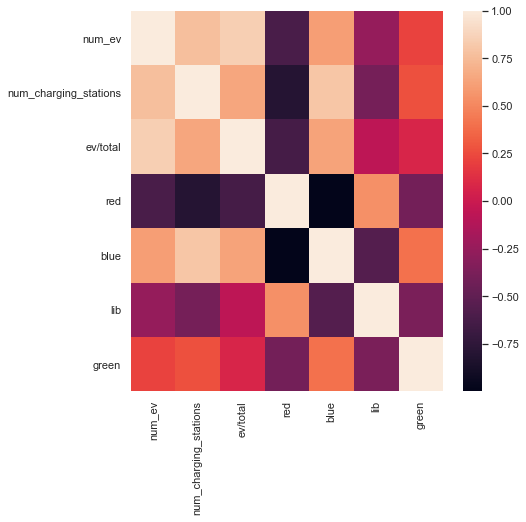

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")

plt.figure(figsize=(7, 7))
ax = sns.heatmap(combined_df.corr())

print(combined_df['num_charging_stations'].corr(combined_df['ev/total']))
print(combined_df['red'].corr(combined_df['ev/total']))
print(combined_df['blue'].corr(combined_df['ev/total']))
print(combined_df['lib'].corr(combined_df['ev/total']))
print(combined_df['green'].corr(combined_df['ev/total']))